<a href="https://colab.research.google.com/github/Sriramgosikonda/Melanoma-skin-cancer-detection-using-CNN/blob/main/practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import pathlib
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import random
import pathlib
from tensorflow import keras
import keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the dataset
!unzip "/content/drive/MyDrive/Colab Notebooks/CNN_assignment.zip" > /dev/null

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [ ]:
# Count the number of image in Train and Test directory
# Using the glob to retrieve files/pathnames matching a specified pattern.

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
batch_size = 42
img_height = 180
img_width = 180

In [ ]:
#Train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
#Validation Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


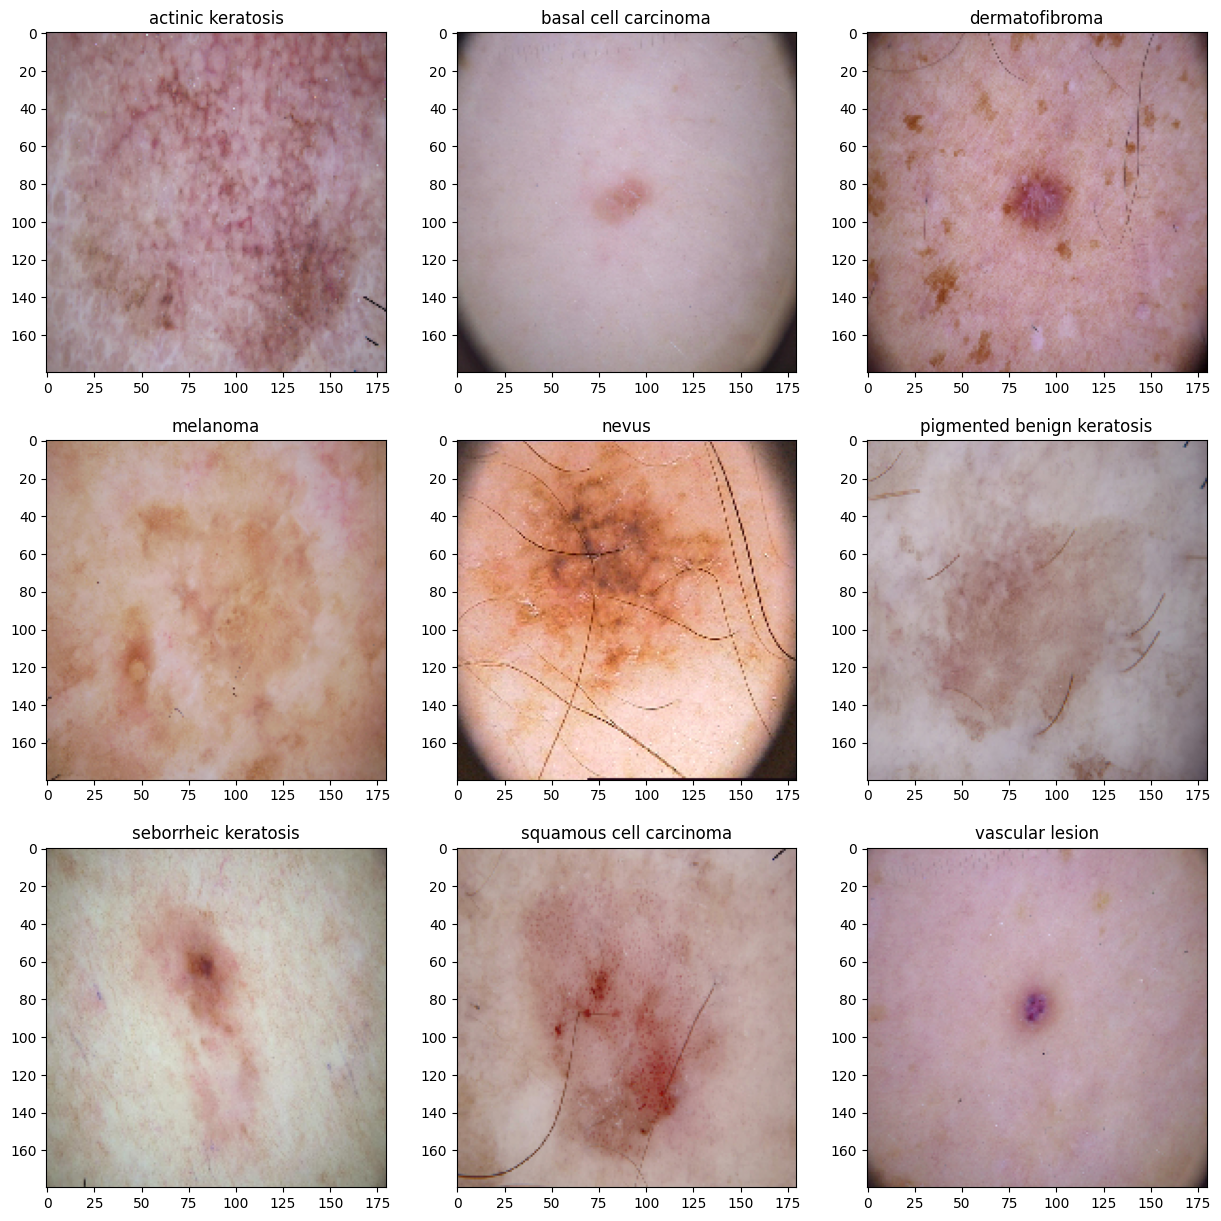

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [ ]:


# Define input shape
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

# Assume class_names is predefined
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma',
               'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma',
               'vascular lesion']

# Create the model
model = Sequential()  # Sequential allows you to create models layer-by-layer

# First Convolution Layer
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second Convolution Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third Convolution Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())  # Flattens the multi-dimensional input tensors into a single dimension

# Dense Layers
model.add(layers.Dense(512, activation='tanh'))  # Changed to 'tanh'
model.add(layers.Dense(128, activation='sigmoid'))  # Changed to 'sigmoid'

# Dense Layer with softmax activation function
# Softmax is an activation function that scales numbers/logits into probabilities
model.add(layers.Dense(len(class_names), activation='softmax'))

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,462,921 (169.61 MB)

 Trainable params: 44,462,921 (169.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:

# Define input shape
img_height, img_width = 180, 180  # Make sure these dimensions match your dataset
input_shape = (img_height, img_width, 3)

# Number of classes
num_classes = len(class_names)  # Ensure this is correctly set

# Create the model
model = Sequential()

# First Convolution Layer
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second Convolution Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third Convolution Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Flatten())  # Flattens the multi-dimensional input tensors into a single dimension

# Dense Layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output Layer with softmax activation function
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])
model.summary()
# Fit the model
epochs = 35
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 35s 612ms/step - accuracy: 0.2453 - loss: 2.3928 - val_accuracy: 0.3848 - val_loss: 1.6558
Epoch 2/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.4183 - loss: 1.6150 - val_accuracy: 0.4855 - val_loss: 1.5075
Epoch 3/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.4681 - loss: 1.4994 - val_accuracy: 0.5235 - val_loss: 1.3672
Epoch 4/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - accuracy: 0.5337 - loss: 1.3149 - val_accuracy: 0.5190 - val_loss: 1.4248
Epoch 5/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.5709 - loss: 1.2334 - val_accuracy: 0.5324 - val_loss: 1.3638
Epoch 6/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 318ms/step - accuracy: 0.6174 - loss: 1.1368 - val_accuracy: 0.5257 - val_loss: 1.3758
Epoch 7/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.5746 - loss: 1.1730 - val_accuracy: 0.5257 - val_loss: 1.3443
Epoch 8/35
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 367ms/step - accuracy: 0.6393 - loss: 1.0072 - val_accu

In [ ]:


rescale = tf.keras.Sequential([
  # To rescale an input in the [0, 255] range to be in the [0, 1] range
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  # Randomly flip each image horizontally and vertically.
  layers.RandomFlip("horizontal_and_vertical"),

  # Randomly rotate each image.
  layers.RandomRotation(0.2),

  # Randomly zoom each image during training.
  layers.RandomZoom(0.2),

  # Randomly translate each image during training.
  layers.RandomTranslation(0.1, 0.1)
])


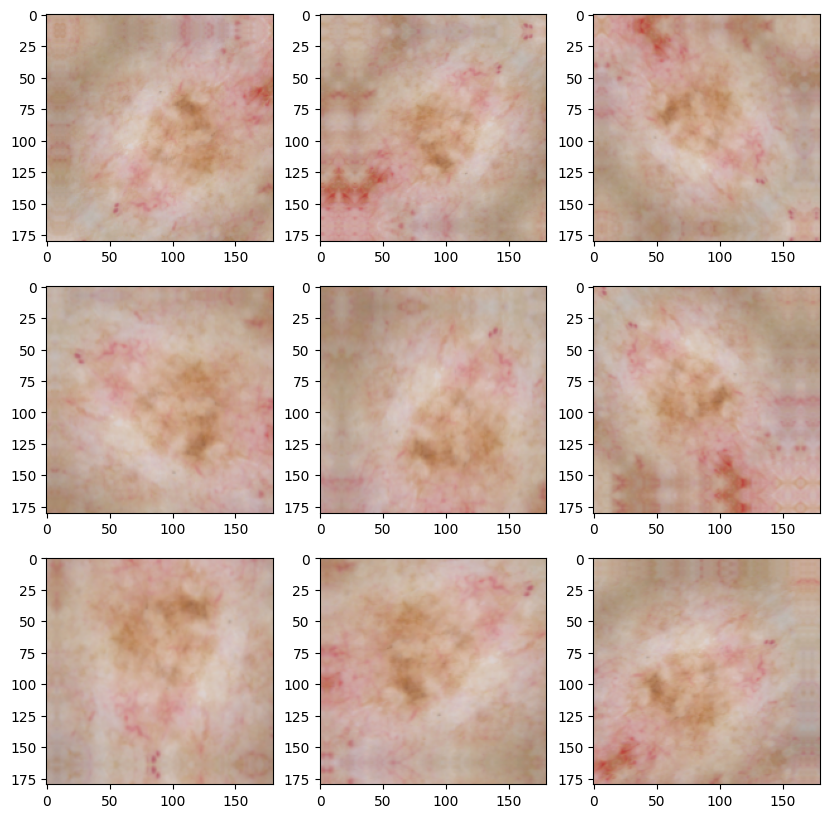

In [ ]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("on")

In [ ]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)


<Axes: xlabel='No. of Image', ylabel='Class'>

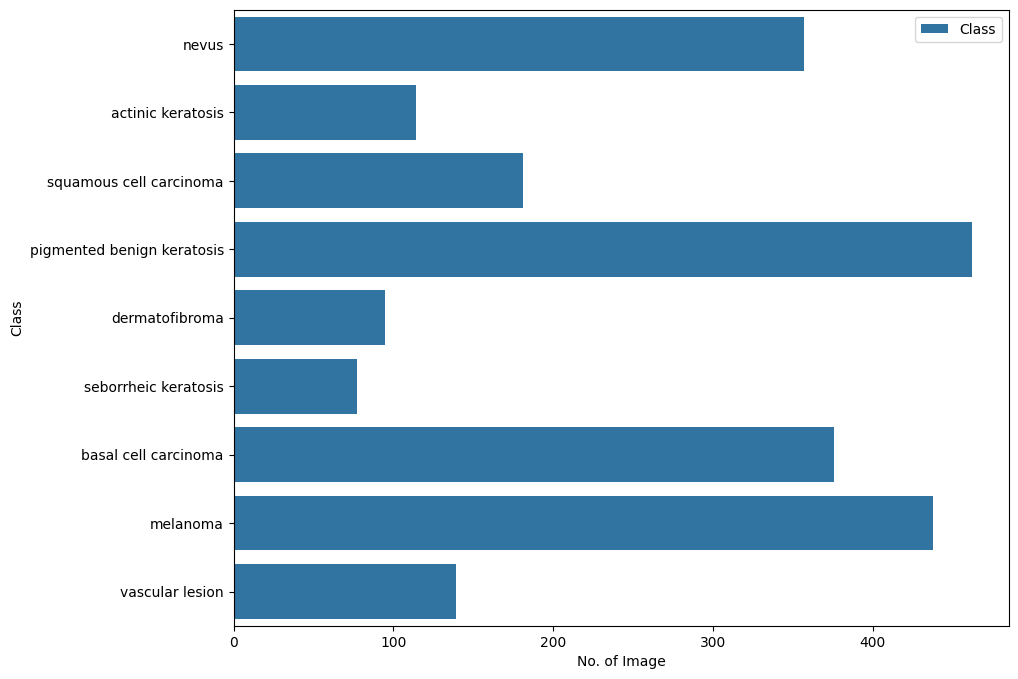

In [ ]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5E57F43DC0>: 100%|██████████| 500/500 [00:18<00:00, 26.33 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5E57F43E20>: 100%|██████████| 500/500 [00:21<00:00, 22.98 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5F206CB100>: 100%|██████████| 500/500 [00:16<00:00, 30.44 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7A5E57E38BB0>: 100%|██████████| 500/500 [01:31<00:00,  5.44 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7A5E56B8BFA0>: 100%|██████████| 500/500 [01:09<00:00,  7.20 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5E57D96DD0>: 100%|██████████| 500/500 [00:15<00:00, 32.89 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A5FC37F91B0>: 100%|██████████| 500/500 [00:34<00:00, 14.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5E57DB0790>: 100%|██████████| 500/500 [00:15<00:00, 32.62 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A5E56B8B610>: 100%|██████████| 500/500 [00:14<00:00, 33.51 Samples/s]


In [ ]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
#label count.
df2['Label'].value_counts()

,count
Label,
nevus,500
pigmented benign keratosis,500
basal cell carcinoma,500
squamous cell carcinoma,500
seborrheic keratosis,500
melanoma,500
dermatofibroma,500
vascular lesion,500
actinic keratosis,500


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Please enter the path to the image: /content/drive/MyDrive/Colab Notebooks/PROJECTPIC.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


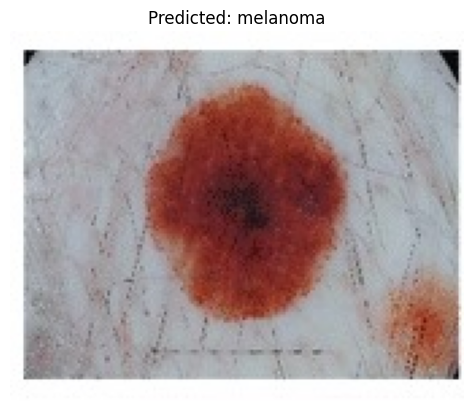

In [ ]:
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# User input for the image path
img_path = input("Please enter the path to the image: ")

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path, target_size=(img_height, img_width))

# Make prediction on the user-provided image
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Display the image with the predicted class name
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()

In [ ]:
suggestions_and_safety = {
    'actinic keratosis': {
        "suggestions": "Use sunscreen with SPF 30+ regularly, avoid excessive sun exposure, and consult a dermatologist for treatments such as cryotherapy or topical medications.",
        "safety_measures": "Monitor the skin for new or changing lesions. Wear protective clothing and a wide-brimmed hat when outdoors. Schedule regular dermatology visits for skin checks."
    },
    'basal cell carcinoma': {
        "suggestions": "Immediate consultation with a dermatologist for evaluation. Discuss treatment options such as surgical excision, Mohs surgery, or topical treatments.",
        "safety_measures": "Protect the skin from sun exposure using broad-spectrum sunscreen and protective clothing. Monitor the treated area for recurrence or new lesions. Regular follow-ups with a dermatologist are essential."
    },
    'dermatofibroma': {
        "suggestions": "Typically benign and may not require treatment. Consult a dermatologist if removal is desired due to discomfort or cosmetic reasons.",
        "safety_measures": "Avoid trauma or irritation to the area. Regularly check for changes in size, color, or texture. If removed, follow wound care instructions provided by your dermatologist."
    },
    'melanoma': {
        "suggestions": "Immediate consultation with a dermatologist is crucial for biopsy and treatment planning, which may include surgical removal or advanced therapies.",
        "safety_measures": "Regularly perform self-examinations for new or changing moles. Protect the skin from UV exposure using sunscreen and clothing. Follow up with your dermatologist as recommended for further treatment or monitoring."
    },
    'nevus (mole)': {
        "suggestions": "Monitor for any changes in size, shape, or color. Consult a dermatologist if the mole exhibits any irregularities.",
        "safety_measures": "Use sun protection to prevent changes in moles. Keep track of any new moles or changes in existing ones. Schedule regular skin exams with your dermatologist."
    },
    'pigmented benign keratosis': {
        "suggestions": "Generally benign; monitor for changes. Consult a dermatologist if the lesion becomes irritating or painful.",
        "safety_measures": "Avoid picking or scratching the lesion. Maintain skin hydration to reduce irritation. If any changes occur, promptly seek advice from a dermatologist."
    },
    'seborrheic keratosis': {
        "suggestions": "Typically benign and may not require treatment. Cosmetic removal options can be discussed with a dermatologist if desired.",
        "safety_measures": "Avoid scratching or picking at the keratosis to prevent irritation. Monitor the area for any sudden changes or bleeding. Regular check-ups with a dermatologist can ensure the lesion remains benign."
    },
    'squamous cell carcinoma': {
        "suggestions": "Immediate consultation with a dermatologist is necessary for evaluation and treatment, which may include surgical excision or Mohs surgery.",
        "safety_measures": "Protect the skin from further UV exposure. Regular follow-ups with a dermatologist are essential to monitor for recurrence or new lesions. Early detection of new lesions is key to successful treatment."
    },
    'vascular lesion': {
        "suggestions": "Typically benign but consult a dermatologist if there is rapid growth, bleeding, or discomfort. Laser treatment may be considered for cosmetic reasons.",
        "safety_measures": "Avoid trauma to the lesion to prevent bleeding or irritation. Monitor the lesion for any changes. If treated with laser therapy, follow post-procedure care instructions carefully."
    }
}

# After predicting the class
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted: {predicted_class_name}")
print(f"Suggestions: {suggestions_and_safety[predicted_class_name]['suggestions']}")
print(f"Safety Measures: {suggestions_and_safety[predicted_class_name]['safety_measures']}")


Predicted: melanoma
Suggestions: Immediate consultation with a dermatologist is crucial for biopsy and treatment planning, which may include surgical removal or advanced therapies.
Safety Measures: Regularly perform self-examinations for new or changing moles. Protect the skin from UV exposure using sunscreen and clothing. Follow up with your dermatologist as recommended for further treatment or monitoring.
